### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the weather type based on various weather-related features. You have been provided with a dataset named **`"weather_classification_data.csv"`**, which includes several parameters affecting weather conditions. The dataset comprises the following columns:

- temperature: The temperature in degrees Celsius.
- humidity: The humidity percentage.
- wind_speed: The wind speed in kilometers per hour.
- precipitation (%): The precipitation percentage.
- cloud_cover: The cloud cover description.
- atmospheric_pressure: The atmospheric pressure in hPa.
- uv_index: The UV index.
- season: The season during which the data was recorded.
- visibility (km): The visibility in kilometers.
- location: The type of location where the data was recorded.
- weather_type: The target variable for classification, indicating the weather type (Rainy, Sunny, Cloudy, Snowy).
  
Your task is to use this dataset to build and evaluate machine learning models to predict the weather type based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using Support Vector Machine (SVM) with different kernels.

Dataset credits: Nikhil Narayan (https://www.kaggle.com/datasets/nikhil7280/weather-type-classification)

**Import Necessary Libraries**

In [56]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split


### Task 1: Data Preparation and Exploration

1. Import the data from the `"weather_data.csv"` file and store it in a DataFrame.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to understand its structure.
4. Check for any missing values in the dataset and handle them appropriately.
5. Visualize the distribution of key features using appropriate charts:
    - Visualize `season` using a pie chart.
    - Visualize `temperature, humidity, and wind_speed` using histograms.
    - Visualize `precipitation (%)` using a box plot.

In [57]:
# Step 1: Import the data from the "weather_data.csv" file
df=pd.read_csv("weather_data.csv")


# Step 2: Display the number of rows and columns in the dataset
df.shape

# Step 3: Display the first few rows of the dataset to understand its structure.
df.head(4)


,hours_sunlight,humidity_level,daily_temperature
0,10.5,65,22.3
1,9.2,70,21.0
2,7.8,80,18.5
3,6.4,90,17.2


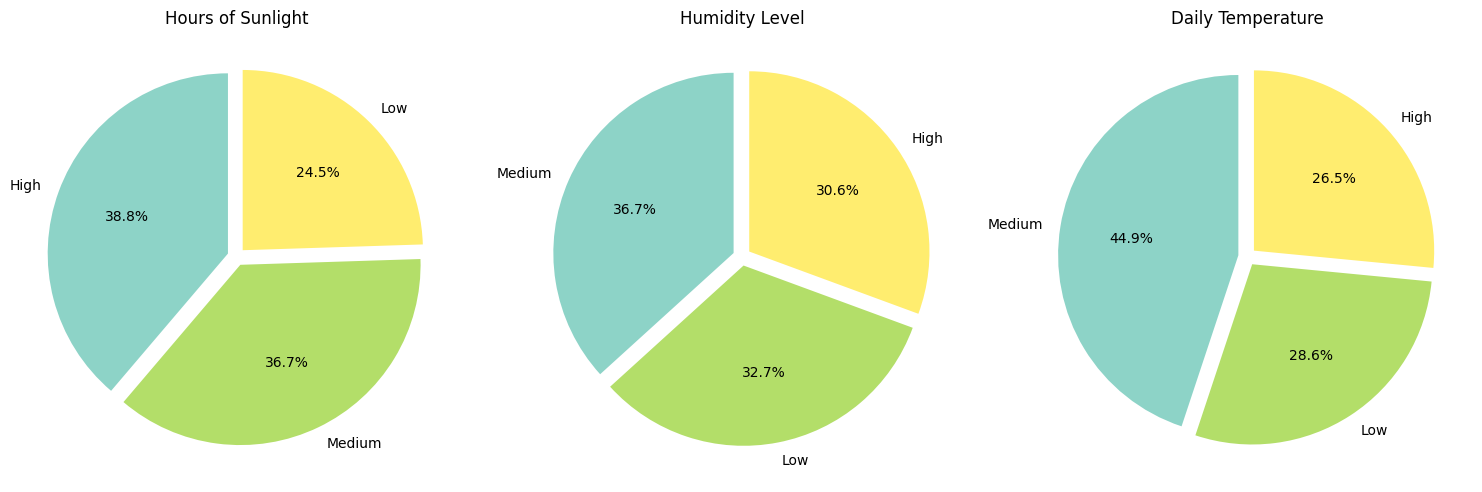

In [58]:
# Step 4: Visualize the distribution of key features
features = ['hours_sunlight', 'humidity_level', 'daily_temperature']
titles = ['Hours of Sunlight', 'Humidity Level', 'Daily Temperature']

# Subplots for 3 pie charts
fig, axes = plt.subplots(1, 3, figsize=(15,5))

for ax, col, title in zip(axes, features, titles):
    # Bin on the fly without saving to df
    binned = pd.cut(df[col], bins=3, labels=['Low', 'Medium', 'High'])
    
    # Plot pie chart
    binned.value_counts().plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        cmap='Set3',
        ax=ax,
        explode=[0.05]*binned.nunique()
    )
    
    ax.set_ylabel('')
    ax.set_title(title)

plt.tight_layout()
plt.show()



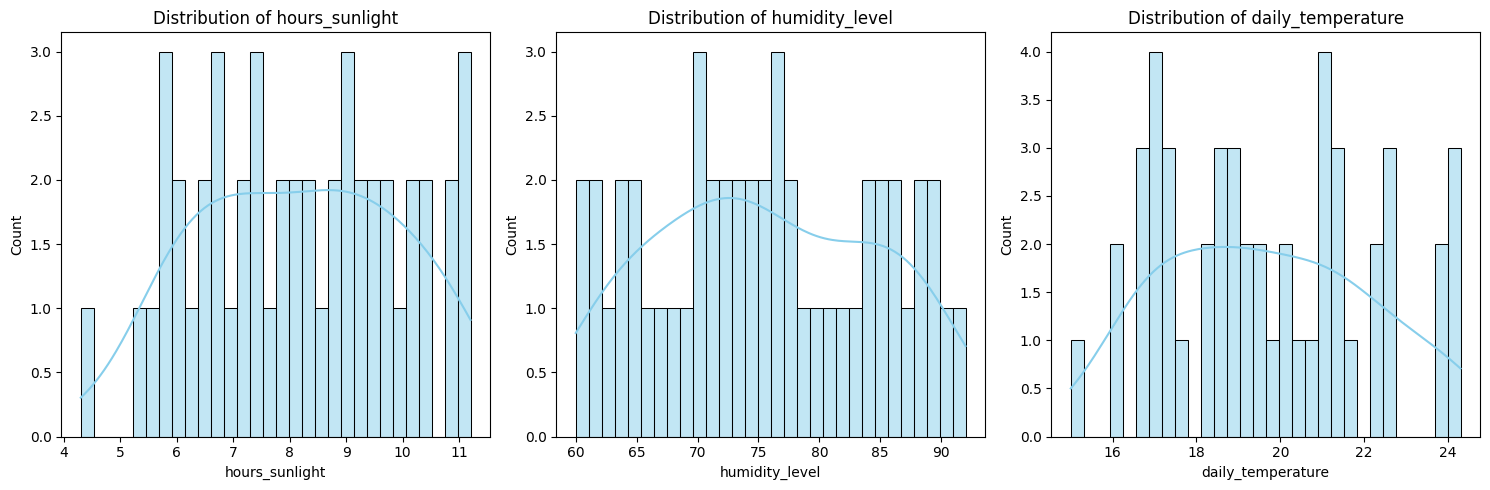

In [59]:
# Visualize temperature, humidity, and wind_speed using histograms
plt.figure(figsize=(15,5))

for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()



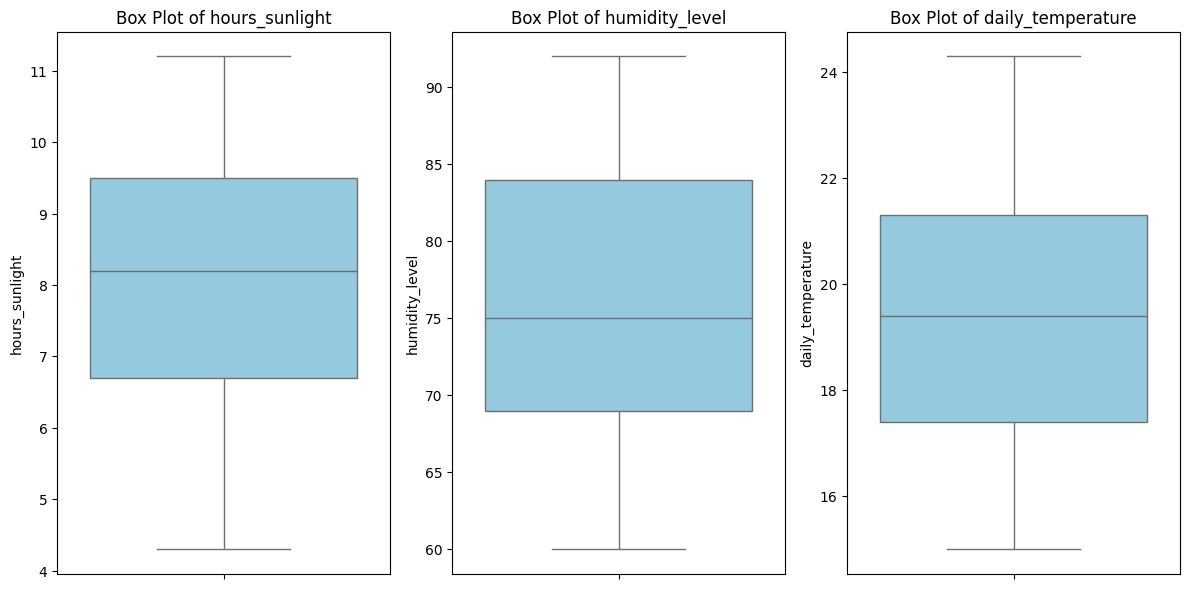

In [60]:
# Visualize precipitation (%) using a box plot
plt.figure(figsize=(12,6))

for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)

plt.tight_layout()
plt.show()




### Task 2: Data Transformation

1. Encode cloud_cover, location and season using one-hot encoding.
2. Scale the numerical features (temperature, humidity, wind_speed, precipitation (%), atmospheric_pressure, uv_index, visibility (km)) using StandardScaler.
3. Display the first few rows of the updated dataset.

In [61]:
# Step 2: Scale the numerical features
from sklearn.preprocessing  import StandardScaler
X = df[['hours_sunlight', 'humidity_level']] 
Y_class = pd.cut(df['daily_temperature'], bins=3, labels=['Low','Medium','High'])  

scaler=StandardScaler()
scaled_X = scaler.fit_transform(X)





In [62]:
# Step3: Display the first few rows of the updated dataset.
scaled_X[:5]



array([[ 1.32610107, -1.17714363],
       [ 0.58963517, -0.61714326],
       [-0.20348194,  0.50285747],
       [-0.99659906,  1.6228582 ],
       [-0.03352827, -0.05714289]])

### Task 3: Model Training Using SVM with Linear Kernel

1. Select the features and the target variable for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Initialize and train an SVM model with a linear kernel using the training data.
4. Print the model's accuracy score on test data.
5. Evaluate the model using a classification report and confusion matrix.

In [63]:
#Split the data
X_train,X_test,Y_train,Y_test=train_test_split(scaled_X,Y_class,test_size=0.3,random_state=42)



In [64]:
# Step 3: Train SVM with linear kernel
svm_model = SVC(kernel='linear', C=1.0, class_weight='balanced')
svm_model.fit(X_train,Y_train)
Y_pred = svm_model.predict(X_test)


# Step 4: Print accuracy score
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {acc*100:.2f}%")




Accuracy: 86.67%


              precision    recall  f1-score   support

        High       1.00      0.75      0.86         4
         Low       0.83      1.00      0.91         5
      Medium       0.83      0.83      0.83         6

    accuracy                           0.87        15
   macro avg       0.89      0.86      0.87        15
weighted avg       0.88      0.87      0.86        15



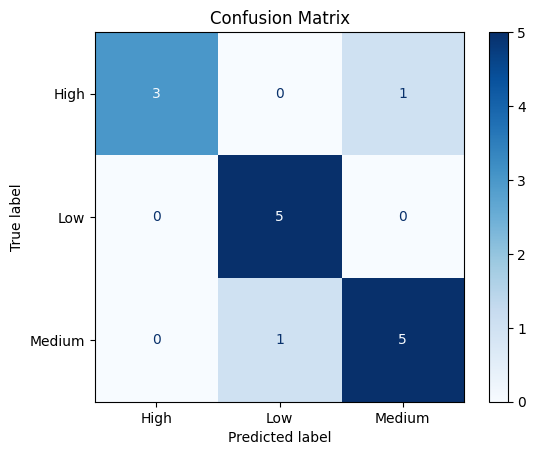

In [69]:
#classification report
report=classification_report(Y_test,Y_pred)
print(report)




#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred, cmap='Blues', normalize=None)
plt.title("Confusion Matrix")
plt.show()




### Task 4: Model Training Using SVM with RBF Kernel

1. Initialize and train an SVM model with an RBF kernel using the training data.
2. Print the model's accuracy score on test data.
3. Evaluate the model using a classification report and confusion matrix.

Accuracy: 86.67%
              precision    recall  f1-score   support

        High       1.00      0.75      0.86         4
         Low       0.83      1.00      0.91         5
      Medium       0.83      0.83      0.83         6

    accuracy                           0.87        15
   macro avg       0.89      0.86      0.87        15
weighted avg       0.88      0.87      0.86        15



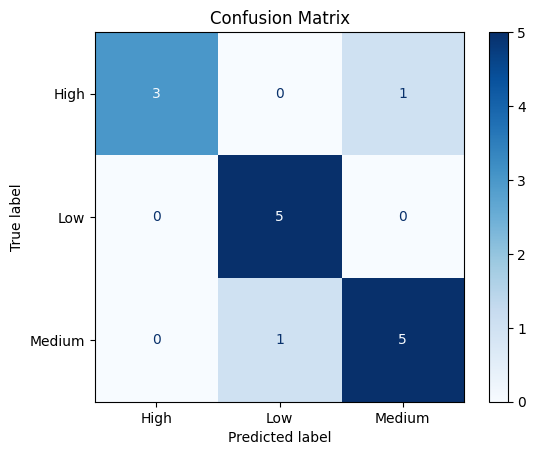

In [73]:
# Step 1: Train SVM with RBF kernel

svm_model = SVC(kernel='rbf', C=1.0, class_weight='balanced')
svm_model.fit(X_train,Y_train)
Y_pred = svm_model.predict(X_test)


# Step 2: Print accuracy score
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {acc*100:.2f}%")



#classification report
report=classification_report(Y_test,Y_pred)
print(report)



#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred, cmap='Blues', normalize=None)
plt.title("Confusion Matrix")
plt.show()



### Task 5: Experiment with Hyperparameters in SVM

1. Train an SVM model with an RBF kernel and the following hyperparameters:
    - C=0.5
    - gamma='auto'
    - kernel='rbf'
    - degree=2
      
Learn about these parameters here: [SVC Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

--------------------------------------------------------------------------------------------------------------------------------------------------------

2. Print the model's accuracy score on test data.
3. Evaluate the model using a classification report and confusion matrix.

Accuracy: 86.67%
              precision    recall  f1-score   support

        High       1.00      0.75      0.86         4
         Low       0.83      1.00      0.91         5
      Medium       0.83      0.83      0.83         6

    accuracy                           0.87        15
   macro avg       0.89      0.86      0.87        15
weighted avg       0.88      0.87      0.86        15



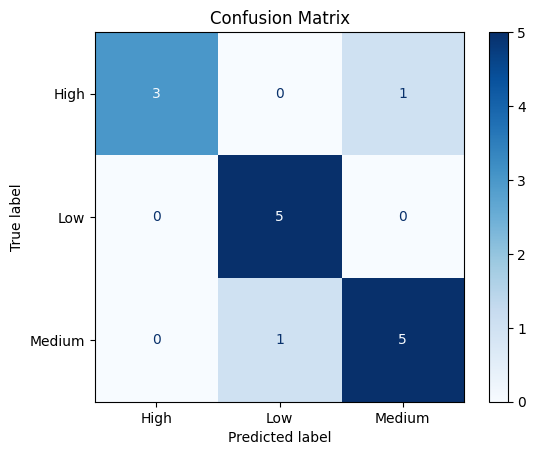

In [78]:
# Step 1: Train the SVM model with specified hyperparameters
svm_model = SVC(kernel='rbf', C=0.5, class_weight='balanced',gamma="auto",degree=2)
svm_model.fit(X_train,Y_train)
Y_pred = svm_model.predict(X_test)


# Step 2: Print the model's accuracy score
acc = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {acc*100:.2f}%")

# Step 4: Evaluate the model using a classification report and confusion matrix


#classification report
report=classification_report(Y_test,Y_pred)
print(report)




#confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred, cmap='Blues', normalize=None)
plt.title("Confusion Matrix")
plt.show()




### Task 6: Implementing Sklearn Pipeline

1. Create a pipeline that includes the StandardScaler and the SVM model with an RBF kernel.
2. Train the pipeline using the training data.
3. Evaluate the pipeline using the test data and print the classification report.

              precision    recall  f1-score   support

        High       1.00      0.75      0.86         4
         Low       0.83      1.00      0.91         5
      Medium       0.83      0.83      0.83         6

    accuracy                           0.87        15
   macro avg       0.89      0.86      0.87        15
weighted avg       0.88      0.87      0.86        15



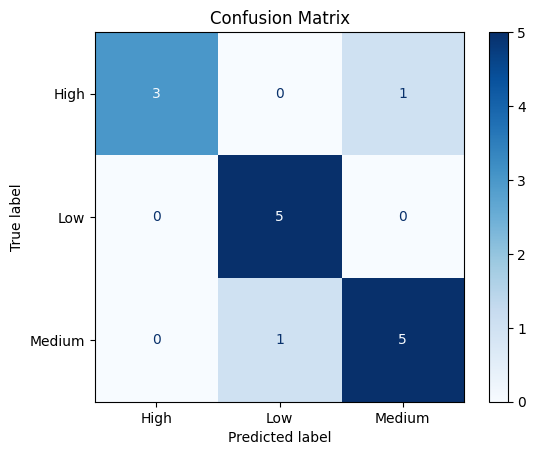

In [86]:
# Create a pipeline with two steps: scaling and SVM with RBF kernel
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=5))
])


# Fit the pipeline on the training data
pipeline.fit(X_train,Y_train)


# Make predictions using the pipeline on the test data
Y_predicted=pipeline.predict(X_test)


# Print the classification report for the pipeline model
report=classification_report(Y_test,Y_pred)
print(report)



# Print the confusion matrix for the pipeline model
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred, cmap='Blues', normalize=None)
plt.title("Confusion Matrix")
plt.show()

